<a href="https://colab.research.google.com/github/bs3537/DS-Unit-4-Sprint-3-Deep-Learning/blob/master/VGG16_from_scratch_mountain_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
print(tensorflow.__version__)

2.2.0-rc3


In [0]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_data_dir = '/content/drive/My Drive/Lambda DS_Unit 4 Deep Learning/CNNs/data/train' 
validation_data_dir = '/content/drive/My Drive/Lambda DS_Unit 4 Deep Learning/CNNs/data/validation'

In [6]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(train_data_dir,target_size=(224,224), class_mode='categorical')
vldata = ImageDataGenerator()
valdata = vldata.flow_from_directory(validation_data_dir, target_size=(224,224), class_mode='categorical')

Found 457 images belonging to 2 classes.
Found 165 images belonging to 2 classes.


In [0]:
#MODEL, CUSTOM V66-16 IN KERAS

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [0]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [0]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [13]:
NUM_EPOCHS = 100

BATCH_SIZE    = 1 

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

stop = EarlyStopping(monitor='val_loss', mode='min', min_delta=0.001, patience=3, verbose=1)
filepath="/content/drive/My Drive/Lambda DS_Unit 4 Deep Learning/CNNs/data/custom_vgg16_v7.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min', save_freq='epoch')
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', min_delta=0.001, factor=0.1, patience=1)

hist = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= valdata, validation_steps=10, epochs=100, callbacks=[checkpoint,stop,rlrop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 324.9336 - accuracy: 0.6159
Epoch 00001: val_loss improved from inf to 0.27451, saving model to /content/drive/My Drive/Lambda DS_Unit 4 Deep Learning/CNNs/data/custom_vgg16_v7.hdf5
100/100 [==============================] - 191s 2s/step - loss: 324.9336 - accuracy: 0.6159 - val_loss: 0.2745 - val_accuracy: 0.8840 - lr: 0.0010
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 0.4142 - accuracy: 0.8003
Epoch 00002: val_loss improved from 0.27451 to 0.26947, saving model to /content/drive/My Drive/Lambda DS_Unit 4 Deep Learning/CNNs/data/custom_vgg16_v7.hdf5
100/100 [==============================] - 33s 333ms/step - loss: 0.4142 - accuracy: 0.8003 - val_loss: 0.2695 - val_accuracy: 0.9248 - lr: 0.0010
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 0.0977 - accuracy: 0.9599
Epoch 00003: val_loss imp

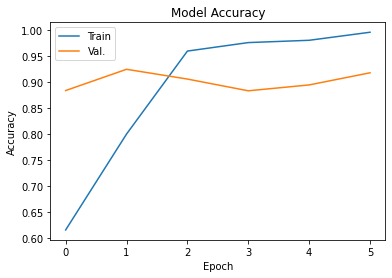

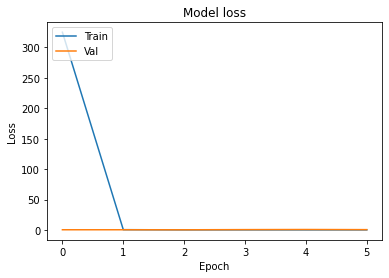

In [17]:
# Plot training & validation accuracy and loss

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val.'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

PREDICT ON TEST IMAGES DOWNLOADED FROM THE INTERNET USING GOOGLE IMAGE SEARCH

forest


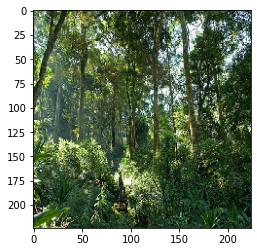

In [22]:
from tensorflow.keras.preprocessing import image
img = image.load_img("/content/drive/My Drive/Lambda DS_Unit 4 Deep Learning/CNNs/test_forest_mountain/rainforest-mozambique.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from tensorflow.keras.models import load_model
saved_model = load_model(filepath)
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("forest")
else:
    print('mountain')


mountain


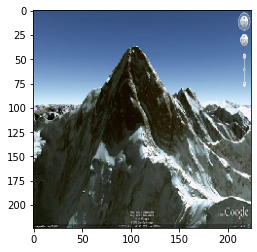

In [23]:
from tensorflow.keras.preprocessing import image
img = image.load_img("/content/drive/My Drive/Lambda DS_Unit 4 Deep Learning/CNNs/test_forest_mountain/2k2.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from tensorflow.keras.models import load_model
saved_model = load_model(filepath)
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("forest")
else:
    print('mountain')

forest


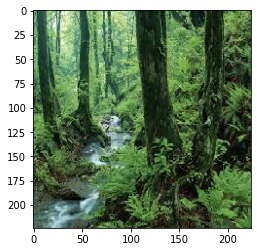

In [24]:
from tensorflow.keras.preprocessing import image
img = image.load_img("/content/drive/My Drive/Lambda DS_Unit 4 Deep Learning/CNNs/test_forest_mountain/images.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from tensorflow.keras.models import load_model
saved_model = load_model(filepath)
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("forest")
else:
    print('mountain')

forest


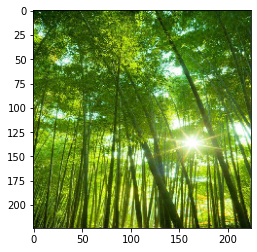

In [25]:
from tensorflow.keras.preprocessing import image
img = image.load_img("/content/drive/My Drive/Lambda DS_Unit 4 Deep Learning/CNNs/test_forest_mountain/5skZyv.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from tensorflow.keras.models import load_model
saved_model = load_model(filepath)
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("forest")
else:
    print('mountain')

mountain


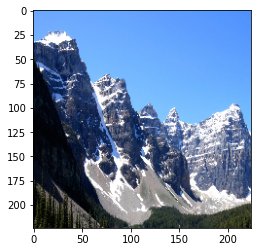

In [26]:
from tensorflow.keras.preprocessing import image
img = image.load_img("/content/drive/My Drive/Lambda DS_Unit 4 Deep Learning/CNNs/test_forest_mountain/bg_wed_1280x800.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from tensorflow.keras.models import load_model
saved_model = load_model(filepath)
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("forest")
else:
    print('mountain')

mountain


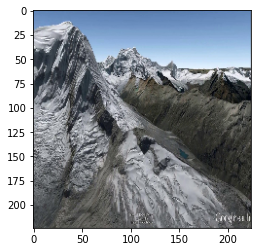

In [27]:
from tensorflow.keras.preprocessing import image
img = image.load_img("/content/drive/My Drive/Lambda DS_Unit 4 Deep Learning/CNNs/test_forest_mountain/maxresdefault (1).jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from tensorflow.keras.models import load_model
saved_model = load_model(filepath)
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("forest")
else:
    print('mountain')

forest


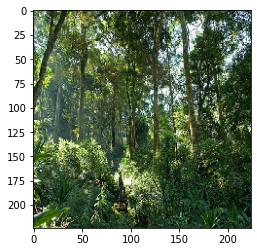

In [28]:
from tensorflow.keras.preprocessing import image
img = image.load_img("/content/drive/My Drive/Lambda DS_Unit 4 Deep Learning/CNNs/test_forest_mountain/rainforest-mozambique.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from tensorflow.keras.models import load_model
saved_model = load_model(filepath)
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("forest")
else:
    print('mountain')

mountain


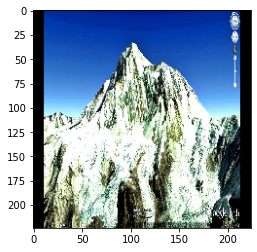

In [31]:
from tensorflow.keras.preprocessing import image
img = image.load_img("/content/drive/My Drive/Lambda DS_Unit 4 Deep Learning/CNNs/test_forest_mountain/maxresdefault.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from tensorflow.keras.models import load_model
#saved_model = load_model(filepath)
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("forest")
else:
    print('mountain')

forest


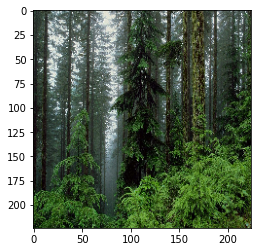

In [32]:
from tensorflow.keras.preprocessing import image
img = image.load_img("/content/drive/My Drive/Lambda DS_Unit 4 Deep Learning/CNNs/test_forest_mountain/c06d118285a55ee7fe647b4285a5dabc.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from tensorflow.keras.models import load_model
#saved_model = load_model(filepath)
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("forest")
else:
    print('mountain')

THE MODEL IS PREDICTING THE TEST IMAGES WITH 100% ACCURACY.